In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)

In [2]:
data = pd.read_csv("../01-data/BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
# Product category 3 can be deleted
pd.concat([data.isnull().sum(),data.isnull().sum()*100/data.shape[0]], axis = 1, keys = ['total', 'percent'])

,total,percent
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,166986,31.062713


In [5]:
# Delete unnecessary columns and columns with to many missing value
data.drop(['User_ID','Product_Category_3'], inplace=True, axis=1)

In [6]:
#Fill missing variables for product_category with mean
data['Product_Category_2'].fillna(round(np.mean(data['Product_Category_2'])), inplace=True) # or backfilling will be considered

In [7]:
for i in data.columns:
    if len(np.unique(data[i])) <=21:
        print(i,np.unique(data[i]))

Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category ['A' 'B' 'C']
Stay_In_Current_City_Years ['0' '1' '2' '3' '4+']
Marital_Status [0 1]
Product_Category_1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Product_Category_2 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]


In [8]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00069042,F,0-17,10,A,2,0,3,10.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,P00087842,F,0-17,10,A,2,0,12,10.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,P00285442,M,55+,16,C,4+,0,8,10.0,7969


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  537577 non-null  object 
 1   Gender                      537577 non-null  object 
 2   Age                         537577 non-null  object 
 3   Occupation                  537577 non-null  int64  
 4   City_Category               537577 non-null  object 
 5   Stay_In_Current_City_Years  537577 non-null  object 
 6   Marital_Status              537577 non-null  int64  
 7   Product_Category_1          537577 non-null  int64  
 8   Product_Category_2          537577 non-null  float64
 9   Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 41.0+ MB


In [10]:
del data['Marital_Status']
del data['Product_ID']

# Which encode method should be used?

In [11]:
# Make gender binary --> M for 0 F for 1
data['Gender'] = data['Gender'].map({'F':0, 'M':1})
# Giving Age Numerical values
data['Age'] = data['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
# Make city category numerical
data['City_Category'] = data['City_Category'].map({'A':0, 'B':1, 'C':2})
# Make stay_in current numerical
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})

In [12]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,3,10.0,8370
1,0,0,10,0,2,1,6.0,15200
2,0,0,10,0,2,12,10.0,1422
3,0,0,10,0,2,12,14.0,1057
4,1,6,16,2,4,8,10.0,7969


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  int64  
 1   Age                         537577 non-null  int64  
 2   Occupation                  537577 non-null  int64  
 3   City_Category               537577 non-null  int64  
 4   Stay_In_Current_City_Years  537577 non-null  int64  
 5   Product_Category_1          537577 non-null  int64  
 6   Product_Category_2          537577 non-null  float64
 7   Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 32.8 MB


In [14]:
for i in data.columns:
    if len(np.unique(data[i])) <=21:
        print(i,np.unique(data[i]))

Gender [0 1]
Age [0 1 2 3 4 5 6]
Occupation [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category [0 1 2]
Stay_In_Current_City_Years [0 1 2 3 4]
Product_Category_1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Product_Category_2 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]


In [15]:
for i in data.columns:
    if i != 'Purchase':
        data[i] = data[i].astype(np.int8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      537577 non-null  int8 
 1   Age                         537577 non-null  int8 
 2   Occupation                  537577 non-null  int8 
 3   City_Category               537577 non-null  int8 
 4   Stay_In_Current_City_Years  537577 non-null  int8 
 5   Product_Category_1          537577 non-null  int8 
 6   Product_Category_2          537577 non-null  int8 
 7   Purchase                    537577 non-null  int64
dtypes: int64(1), int8(7)
memory usage: 7.7 MB


In [17]:
for i in data.columns:
    if len(np.unique(data[i])) <=21:
        print(i,np.unique(data[i]))

Gender [0 1]
Age [0 1 2 3 4 5 6]
Occupation [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category [0 1 2]
Stay_In_Current_City_Years [0 1 2 3 4]
Product_Category_1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Product_Category_2 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


<AxesSubplot:>

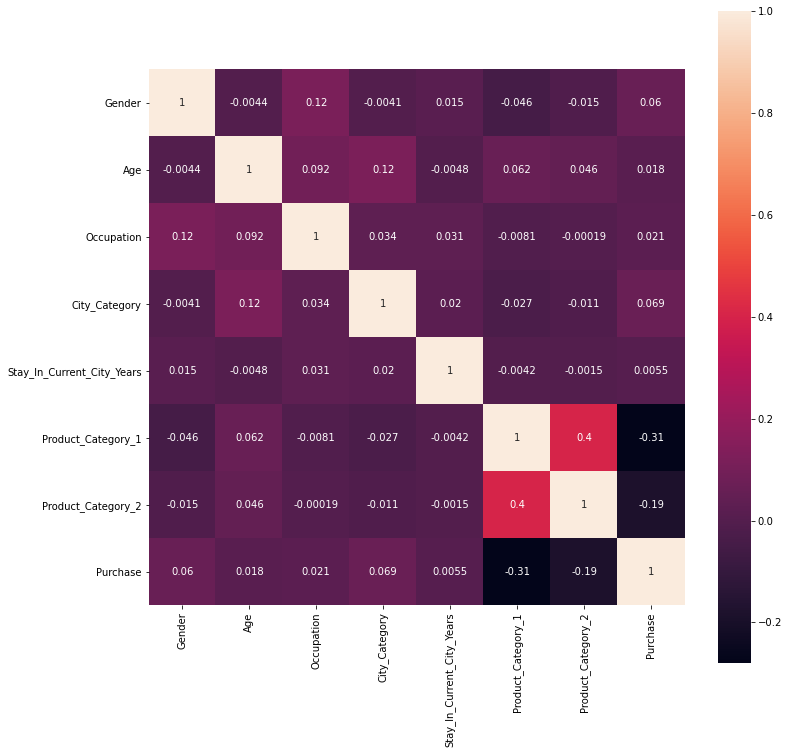

In [18]:
plt.figure(figsize = (12,12))
corr = data.corr()
sns.heatmap(corr,robust=True,annot=True,square=True)

In [19]:
data.to_csv("../01-data/cleaned_black_friday.csv",index=False)